In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('dataset_statsmodels.csv')

In [ ]:
df.shape

(3000, 7)

In [ ]:
df.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [ ]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [ ]:
df.dtypes

valor_aluguel        float64
area_m2                int64
ano_construcao         int64
codigo_localidade      int64
numero_banheiros       int64
numero_cozinhas        int64
codigo_bairro          int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


In [ ]:
# Analíse Exploratória / Resumo Estatístico
df.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [ ]:
df.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [ ]:
# Escolhendo a variável alvo -
df['valor_aluguel'].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<Axes: xlabel='valor_aluguel', ylabel='Count'>

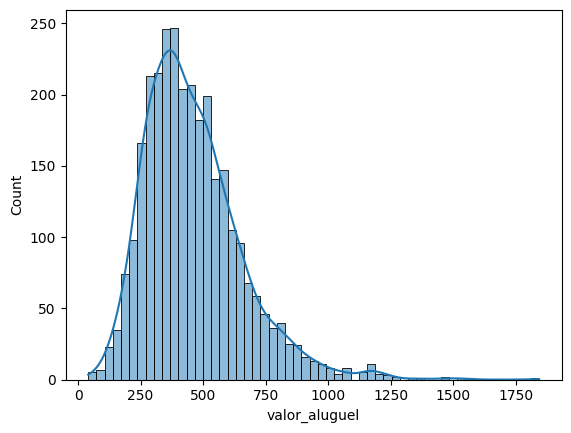

In [ ]:
sns.histplot( data = df, x = 'valor_aluguel', kde=True)
# KDE representa a linha de densidade estimada, importante para ter uma noção suave da distribuição dos dados

In [ ]:
# Criando uma tabela para analisar se as colunas estão atrelada a alguma correlação
df.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

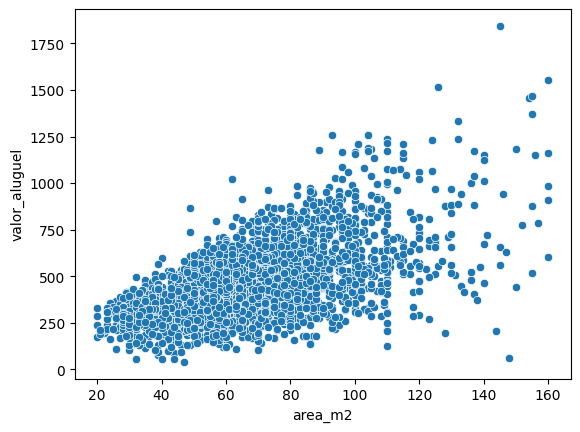

In [ ]:
sns.scatterplot(data = df, x = 'area_m2', y="valor_aluguel")
# Scatterplot é o grafico usado para medir a dispersão.

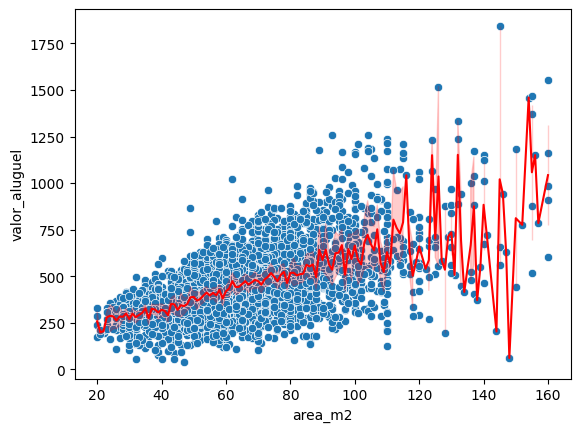

In [ ]:
# Gráfico de dispersão
sns.scatterplot(data=df, x='area_m2', y='valor_aluguel')

# Adicionando a linha de tendência usando sns.lineplot() com x='area_m2' e y='valor_aluguel'
sns.lineplot(data=df, x='area_m2', y='valor_aluguel', color='red')

# Mostra o gráfico
plt.show()

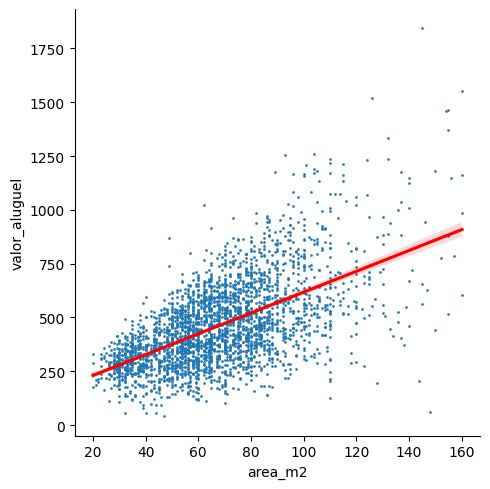

In [ ]:
sns.lmplot(data=df, x='area_m2', y='valor_aluguel', order=1, scatter_kws={"s": 1, "alpha": 0.9}, line_kws={"color": "red"})
plt.show()
# Line_kws define a cor da linha de tendencia
# scatter_kws define os atributos dos pontos de dispersão do gráfico
# order é usado para alterar o polinomio do grau da regressão polinomial, a alteração do grau impacta no treinamento
# dos dados, podendo ajudar na previsão ou atrapalhar na previsão dos dados


## Regressão Linear Simples

A Regressão Linear é uma técnica estatística utilizada para modelar a relação entre uma variável dependente (também chamada de variável resposta ou variável alvo) e uma ou mais variáveis independentes (também chamadas de variáveis explicativas ou preditoras).

A Regressão Linear tem como objetivo estimar os coeficientes da equação que melhor descreve essa relação, minimizando a soma dos erros quadráticos entre os valores observados e os valores previstos pelo modelo.

Existem dois tipos principais de regressão linear:

**Regressão Linear Simples**: Neste caso, há apenas uma variável independente envolvida. A equação da Regressão Linear Simples é expressa como:

Y = a + bX + ε

Onde Y é a variável dependente, X é a variável independente, a é o coeficiente linear (intercepto), b é o coeficiente angular (inclinação) e ε é o erro aleatório.

**Regressão Linear Múltipla**: Neste caso, há duas ou mais variáveis independentes envolvidas. A equação é expressa como:

Y = a + b1X1 + b2X2 + ... + bnXn + ε

Onde Y é a variável dependente, X1, X2, ..., Xn são as variáveis independentes, a é o coeficiente linear (intercepto), b1, b2, ..., bn são os coeficientes angulares (inclinações) e ε é o erro aleatório.

A Regressão Linear é amplamente utilizada em diversas áreas, como economia, ciências sociais, biologia e engenharia, para prever resultados, avaliar relações causais e identificar fatores que contribuem para um fenômeno específico.

Além disso, é uma técnica fundamental para a análise de dados e aprendizado de máquina, onde é usada para desenvolver modelos preditivos.


In [ ]:
# Para a criação dessa regressão linear, usaremos o modelo de construção OLS (Ordinary Least Square) com Statsmodels em python

In [ ]:
df.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [ ]:
y = df['valor_aluguel']
# Variavel dependente (variavel resposta ou alvo)

In [ ]:
X = df['area_m2']
# Variavel independente (variavel explicativa ou preditoras)

In [ ]:
X = sm.add_constant(X)
# O statsmodels requer a adição de uma constante à variavel independente


In [ ]:
modelo = sm.OLS(y,X)
# Criando o modelo

In [ ]:
# Treinamento do modelo
resultado = modelo.fit()

In [ ]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          6.84e-275
Time:                        01:32:13   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

In [ ]:
# Analise com o professor:
# o P>|t| explica o nivel de confiança entre a correlação dos dados, quando menor que 0.05 indica-se um alto nivel de confiança
# o R-square explica o nivel de correlação entre eles

# O modelo nos indica que há uma correlação entre o tamanho (area_m2) e o valor do aluguel (valor_alguel)
# porém no R-square ele nos indica que essa correlação não é unica, podendo não ser a principal ou seja, não é o unico fator que influencia
# embora as variaveis sejam relevantes, não unicamente estão relacionadas, ou nem sempre

## Interpretando o Resultado do Modelo Estatístico com Statsmodels

A tabela acima traz um resumo do modelo com diversas estatísticas. Aqui faremos a análise de uma delas, o R².

O coeficiente de determinação, também conhecido como R², é uma medida estatística que avalia o quão bem o modelo de regressão se ajusta aos dados observados. Ele varia de 0 a 1 e representa a proporção da variação total da variável dependente que é explicada pelo modelo de regressão.

A interpretação do R² é a seguinte:

R² = 0: Neste caso, o modelo de regressão não explica nenhuma variação na variável dependente. Isso significa que o modelo não é útil para prever ou explicar a variável de interesse.

R² = 1: Neste caso, o modelo de regressão explica toda a variação na variável dependente. Isso indica que o modelo se ajusta perfeitamente aos dados e é extremamente útil para prever ou explicar a variável de interesse.

0 < R² < 1: Neste caso, o modelo de regressão explica uma parte da variação na variável dependente. Quanto maior o valor de R², melhor o modelo se ajusta aos dados e melhor é a sua capacidade de prever ou explicar a variável de interesse.

É importante notar que um R² alto não garante que o modelo seja adequado, nem que haja uma relação causal entre as variáveis. Um R² alto pode ser resultado de variáveis irrelevantes, multicolinearidade ou até mesmo de um ajuste excessivo (overfitting). Portanto, é essencial avaliar outras estatísticas e diagnosticar o modelo antes de tirar conclusões definitivas.



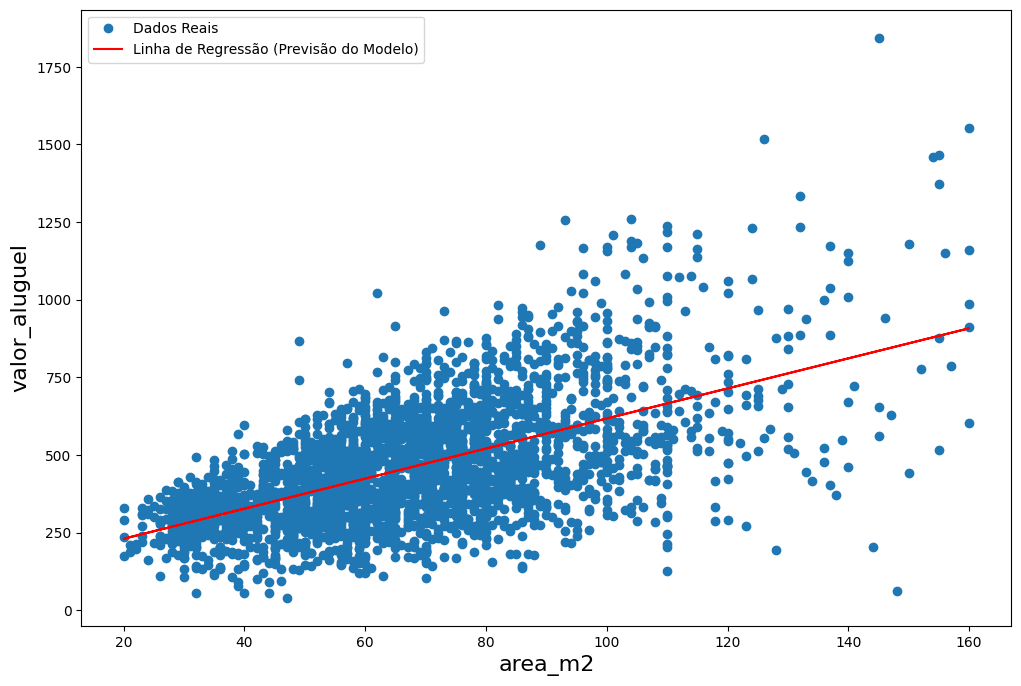

In [ ]:
# Plot
plt.figure(figsize = (12,8))
plt.xlabel("area_m2", size = 16)
plt.ylabel("valor_aluguel", size=16)
plt.plot(X['area_m2'], y, 'o', label = 'Dados Reais')
plt.plot(X['area_m2'], resultado.fittedvalues, 'r-', label = 'Linha de Regressão (Previsão do Modelo)')
plt.legend(loc='best')
plt.show()


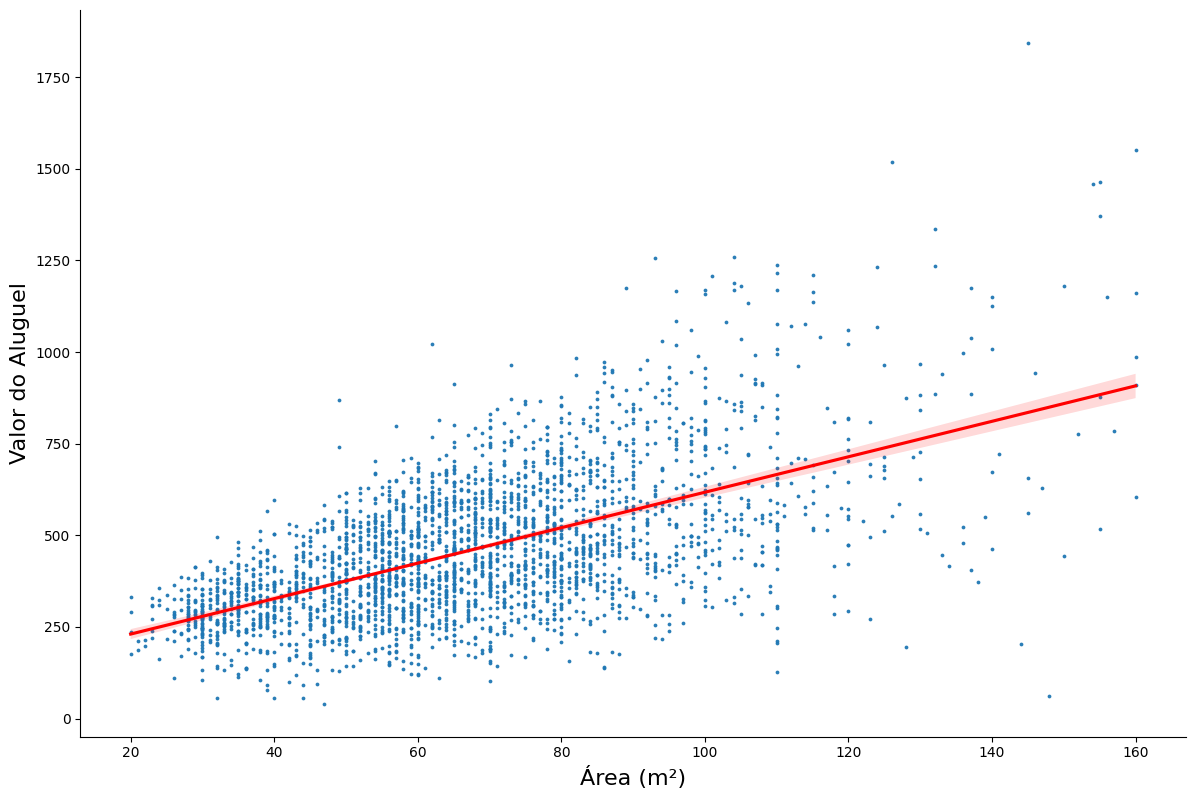

In [ ]:

# Criação do gráfico com personalizações usando matplotlib
grafico = sns.lmplot(data=df, x='area_m2', y='valor_aluguel', order=1, scatter_kws={"s": 3, "alpha": 0.9}, line_kws={"color": "red"}, height=8, aspect=1.5)
grafico.set_axis_labels("Área (m²)", "Valor do Aluguel", fontsize=16)

# Mostra o gráfico
plt.show()